# 2. Capstone Project : Customized Recommendation System with Yelp Dataset
## Data Transformation and Cleaning (Part 2)

**Prepared by:** Daniel Han<br>
**Prepared for:** Brainstation

### 5.2.2 Preliminary Data Wrangling and Combination of Multiple Datasets

The data saved as csv files are read-in as dataframes and cleaned. Also, the four datasets are combined into a single dataset.

#### Import libraries

In [1]:
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#### Show all columns

In [3]:
pd.set_option('display.max_columns', None) # show all columns when displaying a datafame

#### Business Dataset

First, the business dataset is read in and cleaned. *pandas.read_csv* method is used to read in.

In [4]:
# Read in business.csv
df_business = pd.read_csv('business.csv', index_col = 0)

In [5]:
# Review business dataframe
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


It can be seen that the last three columns (i.e., the attributes, categories, and hours columns) appear to be dictionaries or comma separated words. To confirm, the datatype of the first element is reviewed.

In [6]:
# Columna in question
cols = ['attributes', 'categories', 'hours']

# Looping over the list of column names, review the data type each column.
for col in cols:
    dtype = type(df_business.loc[1, col]) # type of data for each column in question. Reviewing the second row which does not contain NaN
    print(f'The {col} column contains {dtype} type data') # print result

The attributes column contains <class 'str'> type data
The categories column contains <class 'str'> type data
The hours column contains <class 'str'> type data


The last three columns are all strings. It is desired to create columns corresponding to the attributes, categories, and business start & end hours of each row to make these three columns easier to work with. In order to detect certain patterns in the string and convert to the desired datatype (i.e., dictionary or list in this case), string replacement using exact matches and regular expressions are used.

In [7]:
## import libraries for string data conversion
import json # used to convert str to dict
import re # used to detect regular expression

##### attributes

An element in the attribtutes column is called to review how the string is formatted.

In [8]:
# Call second row of attributes column
df_business.attributes[2]

'{\'BikeParking\': \'True\', \'BusinessAcceptsCreditCards\': \'True\', \'RestaurantsPriceRange2\': \'2\', \'CoatCheck\': \'False\', \'RestaurantsTakeOut\': \'False\', \'RestaurantsDelivery\': \'False\', \'Caters\': \'False\', \'WiFi\': "u\'no\'", \'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}", \'WheelchairAccessible\': \'True\', \'HappyHour\': \'False\', \'OutdoorSeating\': \'False\', \'HasTV\': \'False\', \'RestaurantsReservations\': \'False\', \'DogsAllowed\': \'False\', \'ByAppointmentOnly\': \'False\'}'

To input the string into a json method and convert the string to a dictionary, certain format must be changed. First, all the single quotes surrounding the keys and values of the dictionaries must be changd to double quotes.

In [9]:
# Convert single quotes to double quotes (e.g. \'BikeParking\' : \'True\' -> "BikeParking" : "True")
df_business['attributes'] = df_business.attributes.str.replace("'","\"")

# Confirm Change
df_business.attributes[2]

'{"BikeParking": "True", "BusinessAcceptsCreditCards": "True", "RestaurantsPriceRange2": "2", "CoatCheck": "False", "RestaurantsTakeOut": "False", "RestaurantsDelivery": "False", "Caters": "False", "WiFi": "u"no"", "BusinessParking": "{"garage": False, "street": False, "validated": False, "lot": True, "valet": False}", "WheelchairAccessible": "True", "HappyHour": "False", "OutdoorSeating": "False", "HasTV": "False", "RestaurantsReservations": "False", "DogsAllowed": "False", "ByAppointmentOnly": "False"}'

In the above example, the value under the "WiFi" Key is "u"no"". The u" part is unnecessary and is dropped. 

In [10]:
# Remove u" (e.g. "WiFi" : "u"no"" -> "WiFi" : "no")
df_business['attributes'] = df_business.attributes.str.replace("u\"","") # Removing the "u at the front
df_business['attributes'] = df_business.attributes.str.replace("\"\"","\"") # Changing all two consecutive double quotes to one

# Confirm Change
df_business.attributes[2]

'{"BikeParking": "True", "BusinessAcceptsCreditCards": "True", "RestaurantsPriceRange2": "2", "CoatCheck": "False", "RestaurantsTakeOut": "False", "RestaurantsDelivery": "False", "Caters": "False", "WiFi": "no", "BusinessParking": "{"garage": False, "street": False, "validated": False, "lot": True, "valet": False}", "WheelchairAccessible": "True", "HappyHour": "False", "OutdoorSeating": "False", "HasTV": "False", "RestaurantsReservations": "False", "DogsAllowed": "False", "ByAppointmentOnly": "False"}'

Some values in the above example (e.g., "validated": False), are not surrounded by parentheses. This must be changed to parentheses.

In [11]:
# Add double quotes to keys or values not wrapped in double quotes (e.g. "validated": False -> "validated": "False")
df_business['attributes'] = df_business.attributes.apply(lambda x : re.sub(' ([^"]+)([,}])', r' "\1"\2', x) if x is not np.nan else np.nan)

# Confirm change
df_business.attributes[2]

'{"BikeParking": "True", "BusinessAcceptsCreditCards": "True", "RestaurantsPriceRange2": "2", "CoatCheck": "False", "RestaurantsTakeOut": "False", "RestaurantsDelivery": "False", "Caters": "False", "WiFi": "no", "BusinessParking": "{"garage": "False", "street": "False", "validated": "False", "lot": "True", "valet": "False"}", "WheelchairAccessible": "True", "HappyHour": "False", "OutdoorSeating": "False", "HasTV": "False", "RestaurantsReservations": "False", "DogsAllowed": "False", "ByAppointmentOnly": "False"}'

Also, there is an additional dictionary nested within this dictionary.

e.g. "BusinessParking": "{"garage": "False", "street": "False", "validated": "False", "lot": "True", "valet": "False"}"

It is desirable to unnest the nested keys.

In [12]:
# Unnest nested keys
# (e.g.
    # "BusinessParking": "{"garage": "False", "street": "False", "validated": "False", "lot": "True", "valet": "False"}"
    # -> "garage": "False", "street": "False", "validated": "False", "lot": "True", "valet": "False"
#)

# Remove the part in front of the nested dictionary
df_business['attributes'] = df_business['attributes'].str.replace(r'"[A-Za-z0-9_]+": "{', '', regex = True)

# Remove the part following the nested dictionary
df_business['attributes'] = df_business['attributes'].str.replace("}\"", "", regex = True)

# Confirm Change
df_business.attributes[2]

'{"BikeParking": "True", "BusinessAcceptsCreditCards": "True", "RestaurantsPriceRange2": "2", "CoatCheck": "False", "RestaurantsTakeOut": "False", "RestaurantsDelivery": "False", "Caters": "False", "WiFi": "no", "garage": "False", "street": "False", "validated": "False", "lot": "True", "valet": "False", "WheelchairAccessible": "True", "HappyHour": "False", "OutdoorSeating": "False", "HasTV": "False", "RestaurantsReservations": "False", "DogsAllowed": "False", "ByAppointmentOnly": "False"}'

Looking at another example:

In [13]:
df_business.attributes[5]

'{"BusinessParking": "None", "BusinessAcceptsCreditCards": "True", "RestaurantsAttire": "casual", "OutdoorSeating": "True", "RestaurantsReservations": "False", "Caters": "False", "RestaurantsTakeOut": "True", "Alcohol": "none", "Ambience": "None", "GoodForKids": "True", "RestaurantsPriceRange2": "1", "ByAppointmentOnly": "False", "CoatCheck": "False", "DogsAllowed": "False", "RestaurantsTableService": "False", "RestaurantsGoodForGroups": "True", "RestaurantsDelivery": "True", "WiFi": "no", "WheelchairAccessible": "True", "HasTV": "True", "HappyHour": "False", "DriveThr: "True", "BikeParking": "False"}'

It can be seen that one of the keys is not closed with parentheses (e.g., "DriveThr: "True").

In [14]:
# Close any key or value with unclosed double quotes at the end (e.g. "DriveThr: "True" -> "DriveThr": "True")
df_business['attributes'] = df_business['attributes'].str.replace(r'("[A-Za-z_]+):', r'\1":', regex = True)

# Confirm Change
df_business.attributes[5]

'{"BusinessParking": "None", "BusinessAcceptsCreditCards": "True", "RestaurantsAttire": "casual", "OutdoorSeating": "True", "RestaurantsReservations": "False", "Caters": "False", "RestaurantsTakeOut": "True", "Alcohol": "none", "Ambience": "None", "GoodForKids": "True", "RestaurantsPriceRange2": "1", "ByAppointmentOnly": "False", "CoatCheck": "False", "DogsAllowed": "False", "RestaurantsTableService": "False", "RestaurantsGoodForGroups": "True", "RestaurantsDelivery": "True", "WiFi": "no", "WheelchairAccessible": "True", "HasTV": "True", "HappyHour": "False", "DriveThr": "True", "BikeParking": "False"}'

From trial and error, certain missing quotations and parentheses were noted and are added. 

In [15]:
# Add double quotes after the opening dictionary bracket '{' (e.g. {valet" : "False", -> {"valet" : "False",)
df_business['attributes'] = df_business['attributes'].str.replace(r'{([a-zA-Z0-9_]+")', r'{"\1', regex = True)

# Close any key or value with unclosed double quotes in the beginning (e.g., valet": "False" ->, "valet" : "False")
df_business['attributes'] = df_business['attributes'].str.replace(r' ([a-zA-Z0-9_]+")', r' "\1', regex = True)

Further minor typographies are also corrected.

In [16]:
# Change minor typographies
df_business['attributes'] = df_business['attributes'].str.replace(', , ', ', ', regex = False) # Removing double commas 
df_business['attributes'] = df_business['attributes'].str.replace('{, ', '{', regex = False) # Removing a comma immediately following an opening dictionary bracket

After cleaning the format of the strings in the attributes column, the strings are converted to dictionaries using the *loads()* method in the *json* class.

In [17]:
# Convert formatted strings to dictionaries
df_business['attributes'] = df_business.attributes.apply(lambda x: json.loads(x) if x is not np.nan else np.nan)

In [18]:
# Review elements in attributes column
df_business.attributes

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'garage': 'False', 'street': 'False', 'valida...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

Once the elements in the attributes column is converted to dictionaries, a list is created containing all the attributes.

In [19]:
# Create an empty set of attributes
all_attributes = set()

# Looping over the elements in the attribute column, add distinct attributes to the set. 
for i in df_business.attributes:
    if i is not np.nan: # if an element is not a NaN (i.e. if an element is a dictionary), 
        for key in i.keys(): # loop over each key in the dictionary
            all_attributes.add(key) # and add to the set of attributes

all_attributes = sorted(list(all_attributes)) # convert the set to list and sort values
print(all_attributes) # print the set of all attributes

['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards', 'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThr', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HairSpecializesIn', 'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi', 'africanamerican', 'asian', 'background_music', 'breakfast', 'brunch', 'casual', 'classy', 'coloring', 'curly', 'dairy-free', 'dessert', 'dinner', 'divey', 'dj', 'extensions', 'friday', 'garage', 'gluten-free', 'halal', 'hipster', 'intimate', 'jukebox', 'karaoke', 'kids', 'kosher', 'latenight', 'live', 'lot', 'lunc

New columns are created, one for each distinct attribute.

In [20]:
# Create a new column for each attribute
for attribute in all_attributes:
    df_business[attribute] = np.empty(len(df_business))

In [21]:
# Display newly added columns
df_business.loc[:,'AcceptsInsurance':].head(3)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThr,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,africanamerican,asian,background_music,breakfast,brunch,casual,classy,coloring,curly,dairy-free,dessert,dinner,divey,dj,extensions,friday,garage,gluten-free,halal,hipster,intimate,jukebox,karaoke,kids,kosher,latenight,live,lot,lunch,monday,no_music,perms,romantic,saturday,soy-free,straightperms,street,sunday,thursday,touristy,trendy,tuesday,upscale,valet,validated,vegan,vegetarian,video,wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Then, a function assigning value to each attribute column is written. 

In [22]:
# function assigning values to attributes
def assign_values_to_attributes(dictionary : dict, key: str):
    if dictionary is np.nan: # if an element contains NaN
        return np.nan # return NaN
    elif key not in dictionary.keys(): # else if key does not exist in dictionary
        return 'Unknown' # return a string 'Unknown'
    else: 
        return dictionary[key] # return value in the dictionary

Use the function created to assign values under each attribute.

In [23]:
# looping over the attributes, apply the function created above and assign values
for attribute in all_attributes:
    df_business[attribute] = df_business['attributes'].apply(lambda x: assign_values_to_attributes(x, attribute))

In [24]:
# Display results
df_business.loc[:,'AcceptsInsurance':].head(3)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThr,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,africanamerican,asian,background_music,breakfast,brunch,casual,classy,coloring,curly,dairy-free,dessert,dinner,divey,dj,extensions,friday,garage,gluten-free,halal,hipster,intimate,jukebox,karaoke,kids,kosher,latenight,live,lot,lunch,monday,no_music,perms,romantic,saturday,soy-free,straightperms,street,sunday,thursday,touristy,trendy,tuesday,upscale,valet,validated,vegan,vegetarian,video,wednesday
0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,Unknown,True,Unknown,False,False,False,Unknown,Unknown,False,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,Unknown,Unknown,Unknown,False,Unknown,Unknown,False,Unknown,2,False,Unknown,False,Unknown,True,no,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,Unknown,Unknown,Unknown,Unknown


For the purpose of the analysis, any null values must be addressed. The proportion of null values are reviewed.

In [25]:
# Review proportion of null values
df_business.loc[:,'AcceptsInsurance':].isna().mean()

AcceptsInsurance    0.091416
AgesAllowed         0.091416
Alcohol             0.091416
Ambience            0.091416
BYOB                0.091416
                      ...   
validated           0.091416
vegan               0.091416
vegetarian          0.091416
video               0.091416
wednesday           0.091416
Length: 88, dtype: float64

These null values are assigned the 'Unknown' category.

In [26]:
# Convert any null value to 'Unknown'
df_business.loc[:,'AcceptsInsurance':] = df_business.fillna('Unknown')

In [27]:
# Display proportion of null values
df_business.loc[:,'AcceptsInsurance':].isna().mean()

AcceptsInsurance    0.0
AgesAllowed         0.0
Alcohol             0.0
Ambience            0.0
BYOB                0.0
                   ... 
validated           0.0
vegan               0.0
vegetarian          0.0
video               0.0
wednesday           0.0
Length: 88, dtype: float64

The proportion of the 'Unknown' values was reviewed for each attribute column. It was deemed that the attributes with high proportions of 'unknown' values would not provide meaningful insights and were dropped.

The threshold for dropping a column was arbitrarily set to be 0.75 (75%) - i.e., if a column contains more than 75% of unknown values, such column is dropped from the analysis.

In [28]:
# Calculate the percentages of unknown values for the attribute columns
unknown_percentages = np.where(df_business.loc[:,'AcceptsInsurance':] == 'Unknown', 1, 0).mean(axis = 0)
unknown_percentages

array([0.96200098, 0.99914198, 0.71273596, 0.99633512, 0.97039496,
       0.99039549, 0.99992684, 0.51686111, 0.88406742, 0.20340415,
       0.98489484, 0.71838958, 0.73310231, 0.96285901, 0.97636784,
       0.99999335, 0.87838719, 0.94838572, 0.96921767, 0.64498557,
       0.99798465, 0.99980046, 0.89909276, 0.7001317 , 0.9997672 ,
       0.74729624, 0.9997406 , 0.67540207, 0.73890227, 0.99987362,
       0.62565017, 0.70621101, 0.43254892, 0.69904753, 0.86709324,
       0.60187168, 0.9696234 , 0.80742421, 0.62144653, 0.99333537,
       0.99333537, 0.95298844, 0.80854828, 0.80854828, 0.70921741,
       0.70921741, 0.99311588, 0.99311588, 0.99980046, 0.80854828,
       0.80854828, 0.71730542, 0.95097309, 0.99311588, 0.96220052,
       0.4093358 , 0.99980046, 0.99980046, 0.70962979, 0.70921741,
       0.95288202, 0.95297514, 0.99311588, 0.99980046, 0.80854828,
       0.95276229, 0.40940896, 0.80854828, 0.96220052, 0.95438522,
       0.99311588, 0.70921741, 0.96220052, 0.99980046, 0.99333

In [29]:
# Select column indices with more than 75% of unknown values
unhelpful_cols = np.where(unknown_percentages >= 0.75)[0]
unhelpful_cols

array([ 0,  1,  3,  4,  5,  6,  8, 10, 13, 14, 15, 16, 17, 18, 20, 21, 22,
       24, 26, 29, 34, 36, 37, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 52,
       53, 54, 56, 57, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74,
       76, 77, 80, 84, 85, 86, 87], dtype=int64)

In [30]:
# Column index of the first attribute column
starting_col_index = df_business.columns.get_loc('AcceptsInsurance')
starting_col_index

14

In [31]:
# Adjusted column indices for dropping
unhelpful_cols_adjusted = unhelpful_cols + starting_col_index
unhelpful_cols_adjusted

array([ 14,  15,  17,  18,  19,  20,  22,  24,  27,  28,  29,  30,  31,
        32,  34,  35,  36,  38,  40,  43,  48,  50,  51,  53,  54,  55,
        56,  57,  60,  61,  62,  63,  64,  66,  67,  68,  70,  71,  74,
        75,  76,  77,  78,  79,  81,  82,  83,  84,  86,  87,  88,  90,
        91,  94,  98,  99, 100, 101], dtype=int64)

In [32]:
# Column names to drop
cols_to_drop = df_business.columns[unhelpful_cols_adjusted]
cols_to_drop

Index(['AcceptsInsurance', 'AgesAllowed', 'Ambience', 'BYOB', 'BYOBCorkage',
       'BestNights', 'BusinessAcceptsBitcoin', 'BusinessParking', 'CoatCheck',
       'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThr',
       'GoodForDancing', 'GoodForMeal', 'HairSpecializesIn', 'HappyHour',
       'Music', 'Open24Hours', 'RestaurantsCounterService',
       'RestaurantsTableService', 'Smoking', 'WheelchairAccessible',
       'africanamerican', 'asian', 'background_music', 'breakfast', 'brunch',
       'coloring', 'curly', 'dairy-free', 'dessert', 'dinner', 'dj',
       'extensions', 'friday', 'gluten-free', 'halal', 'jukebox', 'karaoke',
       'kids', 'kosher', 'latenight', 'live', 'lunch', 'monday', 'no_music',
       'perms', 'saturday', 'soy-free', 'straightperms', 'sunday', 'thursday',
       'tuesday', 'vegan', 'vegetarian', 'video', 'wednesday'],
      dtype='object')

In [33]:
# Drop columns with more than 75% proportions of unknowns
df_business.drop(columns = list(cols_to_drop), inplace = True)

In [34]:
# Display results
df_business.loc[:,'Alcohol':].head(3)

,Alcohol,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,Caters,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,WiFi,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated
0,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unknown,True,True,False,False,Unknown,False,Unknown,False,Unknown,False,Unknown,2,False,False,no,Unknown,Unknown,Unknown,False,Unknown,Unknown,True,Unknown,False,Unknown,Unknown,Unknown,False,False


In [35]:
# Create a list of all helpful attributes
all_helpful_attributes = list(df_business.loc[:,'Alcohol':].columns)

In [36]:
# Looping over each attribute column, display a list of all unique values
for attribute in all_helpful_attributes:
    print(f'{attribute}:')
    print(df_business[attribute].unique(), '\n')

Alcohol:
['Unknown' 'none' 'full_bar' 'beer_and_wine' 'None'] 

BikeParking:
['Unknown' 'True' 'False' 'None'] 

BusinessAcceptsCreditCards:
['Unknown' 'True' 'False' 'None'] 

ByAppointmentOnly:
['True' 'Unknown' 'False' 'None'] 

Caters:
['Unknown' 'False' 'True' 'None'] 

GoodForKids:
['Unknown' 'True' 'False' 'None'] 

HasTV:
['Unknown' 'False' 'True' 'None'] 

NoiseLevel:
['Unknown' 'average' 'quiet' 'loud' 'very_loud' 'None'] 

OutdoorSeating:
['Unknown' 'False' 'True' 'None'] 

RestaurantsAttire:
['Unknown' 'casual' 'formal' 'dressy' 'None'] 

RestaurantsDelivery:
['Unknown' 'False' 'True' 'None'] 

RestaurantsGoodForGroups:
['Unknown' 'True' 'False' 'None'] 

RestaurantsPriceRange2:
['Unknown' '2' '1' '3' '4' 'None'] 

RestaurantsReservations:
['Unknown' 'False' 'True' 'None'] 

RestaurantsTakeOut:
['Unknown' 'False' 'True' 'None'] 

WiFi:
['Unknown' 'no' 'free' 'None' 'paid'] 

casual:
['Unknown' 'False' 'True' 'None'] 

classy:
['Unknown' 'False' 'None' 'True'] 

divey:
['Unk

In [37]:
# Replace 'None' values with 'Unknown'
for attribute in all_helpful_attributes:
    df_business[attribute].replace({'None' : 'Unknown'}, inplace = True)
    print(f'{attribute}:')
    print(df_business[attribute].unique(), '\n')

Alcohol:
['Unknown' 'none' 'full_bar' 'beer_and_wine'] 

BikeParking:
['Unknown' 'True' 'False'] 

BusinessAcceptsCreditCards:
['Unknown' 'True' 'False'] 

ByAppointmentOnly:
['True' 'Unknown' 'False'] 

Caters:
['Unknown' 'False' 'True'] 

GoodForKids:
['Unknown' 'True' 'False'] 

HasTV:
['Unknown' 'False' 'True'] 

NoiseLevel:
['Unknown' 'average' 'quiet' 'loud' 'very_loud'] 

OutdoorSeating:
['Unknown' 'False' 'True'] 

RestaurantsAttire:
['Unknown' 'casual' 'formal' 'dressy'] 

RestaurantsDelivery:
['Unknown' 'False' 'True'] 

RestaurantsGoodForGroups:
['Unknown' 'True' 'False'] 

RestaurantsPriceRange2:
['Unknown' '2' '1' '3' '4'] 

RestaurantsReservations:
['Unknown' 'False' 'True'] 

RestaurantsTakeOut:
['Unknown' 'False' 'True'] 

WiFi:
['Unknown' 'no' 'free' 'paid'] 

casual:
['Unknown' 'False' 'True'] 

classy:
['Unknown' 'False' 'True'] 

divey:
['Unknown' 'False' 'True'] 

garage:
['Unknown' 'False' 'True'] 

hipster:
['Unknown' 'False' 'True'] 

intimate:
['Unknown' 'False

In [38]:
# Replace column name 'RestaurantsPriceRange2' to 'RestaurantsPriceRange'
df_business.rename(columns = {'RestaurantsPriceRange2': 'RestaurantsPriceRange'}, inplace = True)

While most of the attribute colums are categorical, the it is more reasonable to treat the RestaurantsPriceRange as a numerical column since there is a notion of price in that column. Therefore, the datatype of the column is converted to numbers. 

In [39]:
# Attempt to change each element in the RestaurantsPriceRange column to integer, otherwise NaN
df_business['RestaurantsPriceRange'] = df_business['RestaurantsPriceRange'].apply(lambda x: int(x) if x != 'Unknown' else np.nan)

In [40]:
# Display values
df_business['RestaurantsPriceRange']

0         NaN
1         NaN
2         2.0
3         1.0
4         NaN
         ... 
150341    3.0
150342    2.0
150343    1.0
150344    4.0
150345    1.0
Name: RestaurantsPriceRange, Length: 150346, dtype: float64

Now that the unknown values in the RestaurantsPriceRange column have been changed to NaN, they are replaced with the median rating.

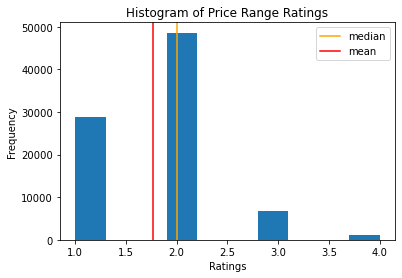

In [41]:
# Review distribution of ratings

# Plot distribution
df_business['RestaurantsPriceRange'].plot(kind = 'hist', label = '__nolegend__')

# Mark Median
plt.axvline(df_business['RestaurantsPriceRange'].median(), color = 'orange', label = 'median')

# Mark Mean
plt.axvline(df_business['RestaurantsPriceRange'].mean(), color = 'r', label = 'mean')

# Legend
plt.legend()

# Title
plt.title('Histogram of Price Range Ratings')

# x-axis labelling

plt.xlabel('Ratings')

plt.show()

In [42]:
# Replace NaNs with medians
df_business['RestaurantsPriceRange'] = df_business['RestaurantsPriceRange'].fillna(df_business['RestaurantsPriceRange'].median())

Now that attribute columns have been created and processed, the original 'attributes' column is deleted.

In [43]:
# Drop 'attibutes' column
df_business.drop(columns = 'attributes', inplace = True)

##### categories

The 'categories' column contains a string of comma-separated categories. using the *split* method, this string is converted to a list of categories in strings.

In [44]:
# split string of categories to list of categories
df_business['categories'] = df_business.categories.str.split(', ')

# display categories column
df_business['categories']

0         [Doctors, Traditional Chinese Medicine, Naturo...
1         [Shipping Centers, Local Services, Notaries, M...
2         [Department Stores, Shopping, Fashion, Home & ...
3         [Restaurants, Food, Bubble Tea, Coffee & Tea, ...
4                               [Brewpubs, Breweries, Food]
                                ...                        
150341                         [Nail Salons, Beauty & Spas]
150342    [Pets, Nurseries & Gardening, Pet Stores, Hobb...
150343    [Shopping, Jewelry, Piercing, Toy Stores, Beau...
150344    [Fitness/Exercise Equipment, Eyewear & Opticia...
150345    [Beauty & Spas, Permanent Makeup, Piercing, Ta...
Name: categories, Length: 150346, dtype: object

A list containing the distinct categories was created.

In [45]:
# Create an empty set that will contain categories
all_categories = set()

# Looping over the rows of the business column, add a distinct category
for i in range(len(df_business)):
    
    if df_business['categories'][i] is np.nan: # if a row contains a NaN value,
        pass # ignore
    else: # if not
        for j in df_business['categories'][i]: # looping over the categories of a list
            all_categories.add(j) # add the category to the set

all_categories = sorted(list(all_categories)) # convert set to list and sort

# Display result
all_categories

['& Probates',
 '3D Printing',
 'ATV Rentals/Tours',
 'Acai Bowls',
 'Accessories',
 'Accountants',
 'Acne Treatment',
 'Active Life',
 'Acupuncture',
 'Addiction Medicine',
 'Adoption Services',
 'Adult',
 'Adult Education',
 'Adult Entertainment',
 'Advertising',
 'Aerial Fitness',
 'Aerial Tours',
 'Aestheticians',
 'Afghan',
 'African',
 'Air Duct Cleaning',
 'Aircraft Dealers',
 'Aircraft Repairs',
 'Airlines',
 'Airport Lounges',
 'Airport Shuttles',
 'Airport Terminals',
 'Airports',
 'Airsoft',
 'Allergists',
 'Alternative Medicine',
 'Amateur Sports Teams',
 'American (New)',
 'American (Traditional)',
 'Amusement Parks',
 'Anesthesiologists',
 'Animal Assisted Therapy',
 'Animal Physical Therapy',
 'Animal Shelters',
 'Antiques',
 'Apartment Agents',
 'Apartments',
 'Appliances',
 'Appliances & Repair',
 'Appraisal Services',
 'Aquarium Services',
 'Aquariums',
 'Arabic',
 'Arcades',
 'Archery',
 'Architects',
 'Architectural Tours',
 'Argentine',
 'Armenian',
 'Art Classes',

A new column was created for every category above, and a binary value indicating whether the business falls under the category was assigned. 

In [46]:
for category in all_categories: # for each category
    # if the row does not contain a NaN, assign a value of 1 if a business falls under the category and 0 if not
    df_business[category] = df_business['categories'].apply(lambda x: np.nan if x is np.nan else (1 if category in x else 0))

# Display Result
df_business.loc[:,'& Probates':].head()

,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,Adoption Services,Adult,Adult Education,Adult Entertainment,Advertising,Aerial Fitness,Aerial Tours,Aestheticians,Afghan,African,Air Duct Cleaning,Aircraft Dealers,Aircraft Repairs,Airlines,Airport Lounges,Airport Shuttles,Airport Terminals,Airports,Airsoft,Allergists,Alternative Medicine,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Animal Assisted Therapy,Animal Physical Therapy,Animal Shelters,Antiques,Apartment Agents,Apartments,Appliances,Appliances & Repair,Appraisal Services,Aquarium Services,Aquariums,Arabic,Arcades,Archery,Architects,Architectural Tours,Argentine,Armenian,Art Classes,Art Consultants,Art Galleries,Art Installation,Art Museums,Art Restoration,Art Schools,Art Space Rentals,Art Supplies,Art Tours,Artificial Turf,Arts & Crafts,Arts & Entertainment,Asian Fusion,Assisted Living Facilities,Astrologers,Attraction Farms,Auction Houses,Audio/Visual Equipment Rental,Audiologist,Australian,Austrian,Auto Customization,Auto Detailing,Auto Glass Services,Auto Insurance,Auto Loan Providers,Auto Parts & Supplies,Auto Repair,Auto Security,Auto Upholstery,Automotive,Aviation Services,Awnings,Axe Throwing,Ayurveda,Baby Gear & Furniture,Backflow Services,Badminton,Bagels,Bail Bondsmen,Bakeries,Balloon Services,Bangladeshi,Bankruptcy Law,Banks & Credit Unions,Bar Crawl,Barbeque,Barbers,Barre Classes,Bars,Bartenders,Bartending Schools,Baseball Fields,Basketball Courts,Basque,Battery Stores,Batting Cages,Beach Bars,Beach Equipment Rentals,Beaches,Beauty & Spas,Bed & Breakfast,Beer,Beer Bar,Beer Gardens,Beer Hall,Beer Tours,Behavior Analysts,Belgian,Bespoke Clothing,Beverage Store,Bicycle Paths,Bicycles,Bike Parking,Bike Rentals,Bike Repair,Bike Repair/Maintenance,Bike Sharing,Bike Shop,Bike tours,Bikes,Billing Services,Bingo Halls,Biohazard Cleanup,Bird Shops,Bistros,Blood & Plasma Donation Centers,Blow Dry/Out Services,Boat Charters,Boat Dealers,Boat Parts & Supplies,Boat Repair,Boat Tours,Boating,Bocce Ball,Body Contouring,Body Shops,Bookbinding,Bookkeepers,Books,Bookstores,Boot Camps,Botanical Gardens,Boudoir Photography,Bounce House Rentals,Bowling,Boxing,Brasseries,Brazilian,Brazilian Jiu-jitsu,Breakfast & Brunch,Breweries,Brewing Supplies,Brewpubs,Bridal,British,Bubble Soccer,Bubble Tea,Buddhist Temples,Buffets,Building Supplies,Burgers,Burmese,Bus Rental,Bus Stations,Bus Tours,Buses,Business Consulting,Business Financing,Business Law,Butcher,CPR Classes,CSA,Cabaret,Cabinetry,Cafes,Cafeteria,Cajun/Creole,Calabrian,Calligraphy,Cambodian,Campgrounds,Canadian (New),Candle Stores,Candy Stores,Cannabis Clinics,Cannabis Collective,Cannabis Dispensaries,Cannabis Tours,Cantonese,Car Auctions,Car Brokers,Car Buyers,Car Dealers,Car Inspectors,Car Rental,Car Share Services,Car Stereo Installation,Car Wash,Car Window Tinting,Cardio Classes,Cardiologists,Cards & Stationery,Career Counseling,Caribbean,Caricatures,Carousels,Carpenters,Carpet Cleaning,Carpet Dyeing,Carpet Installation,Carpeting,Casinos,Caterers,Ceremonial Clothing,Challenge Courses,Champagne Bars,Check Cashing/Pay-day Loans,Cheerleading,Cheese Shops,Cheese Tasting Classes,Cheesesteaks,Chicken Shop,Chicken Wings,Child Care & Day Care,Childbirth Education,Childproofing,Children's Clothing,Children's Museums,Chimney Sweeps,Chinese,Chinese Martial Arts,Chiropractors,Chocolatiers & Shops,Christmas Trees,Churches,Cideries,Cigar Bars,Cinema,Circuit Training Gyms,Circus Schools,Climbing,Clock Repair,Clothing Rental,Clowns,Club Crawl,Cocktail Bars,Coffee & Tea,Coffee & Tea Supplies,Coffee Roasteries,Coffeeshops,College Counseling,Colleges & Universities,Colombian,Colonics,Comedy Clubs,Comfort Food,Comic Books,Commercial Real Estate,Commercial Truck Dealers,Commercial Truck Repair,Commissioned Artists,Community Centers,Community Gardens,Community Service/Non-Profit,Computers,Concept Shops,Concierge M

While there were broard categories such as 'Restaurants', 'Automotive', or 'Health & Medical', some categories such as 'Italian' were relatively narrower and applied to only 2% of the entire dataset. A threshold was set at 5% such that any category which applies to less than 5% of the data is dropped from the dataset.

In [47]:
# Proportion of value 1 for all categories 
category_proportions = df_business.loc[:,'& Probates':].mean(axis = 0)

# Listing values sorted
category_proportions.sort_values(ascending = False)[:30]

Restaurants                  0.347890
Food                         0.184907
Shopping                     0.162370
Home Services                0.095552
Beauty & Spas                0.095126
Nightlife                    0.081741
Health & Medical             0.079138
Local Services               0.074533
Bars                         0.073647
Automotive                   0.071704
Event Planning & Services    0.065860
Sandwiches                   0.055683
American (Traditional)       0.054172
Active Life                  0.051164
Pizza                        0.047210
Coffee & Tea                 0.044614
Fast Food                    0.043077
Breakfast & Brunch           0.041526
American (New)               0.040581
Hotels & Travel              0.038984
Home & Garden                0.038597
Fashion                      0.038198
Burgers                      0.037513
Arts & Entertainment         0.036168
Auto Repair                  0.036161
Hair Salons                  0.033586
Nail Salons 

In [48]:
# Categories where proportion of value 1 is greater than 0.05
meaningful_categories = category_proportions[category_proportions > 0.05]

# Categories where proportion of value 1 is less than or equal to 0.05
other_categories = category_proportions[category_proportions <= 0.05]

In [49]:
# Indices of categories to be dropped
other_categories.keys()

Index(['& Probates', '3D Printing', 'ATV Rentals/Tours', 'Acai Bowls',
       'Accessories', 'Accountants', 'Acne Treatment', 'Acupuncture',
       'Addiction Medicine', 'Adoption Services',
       ...
       'Wine Tasting Room', 'Wine Tours', 'Wineries', 'Women's Clothing',
       'Workers Compensation Law', 'Wraps', 'Yelp Events', 'Yoga', 'Ziplining',
       'Zoos'],
      dtype='object', length=1297)

In [50]:
# Drop columns with proportions less than 0.05
df_business.drop(columns = other_categories.keys(), inplace = True)

# Display
df_business.loc[:,'Active Life':].head()

,Active Life,American (Traditional),Automotive,Bars,Beauty & Spas,Event Planning & Services,Food,Health & Medical,Home Services,Local Services,Nightlife,Restaurants,Sandwiches,Shopping
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that categories columns have been created and processed, the original 'categories' column is deleted.

In [51]:
# Drop categories column
df_business.drop(columns = 'categories', inplace = True)

##### hours

The hours column also contains strings of dictionaries. The strings are reformatted.

In [52]:
# Replace single quotes to double quotes
df_business['hours'] = df_business['hours'].str.replace("'","\"")

In [53]:
# Convert strings to dictionaries
df_business['hours'] = df_business.hours.apply(lambda x: json.loads(x) if x is not np.nan else np.nan)

In [54]:
# Create a list of days
days = list(df_business['hours'][1].keys())
# Display
days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [55]:
# Add empty columns for start and end times
for day in days:
    df_business[f'{day}_start_time'] = np.empty(len(df_business)) # empty columns for start times
    df_business[f'{day}_end_time'] = np.empty(len(df_business)) # empty columns for end times

# Display
df_business.loc[:,'Monday_start_time':]

,Monday_start_time,Monday_end_time,Tuesday_start_time,Tuesday_end_time,Wednesday_start_time,Wednesday_end_time,Thursday_start_time,Thursday_end_time,Friday_start_time,Friday_end_time,Saturday_start_time,Saturday_end_time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A function is then created to assign the start and end times for the columns.

In [56]:
# Create a column assigning business hours
def create_business_hours(dictionary: dict, day_time : str):
    if dictionary is np.nan: # If the hours column is NaN
        return np.nan # Return NaN
    else: # Otherwise
        days = dictionary.keys() # Create a list of days in an element 
        day_of_interest = day_time.split('_')[0] # Extract day from column name
        
        if day_of_interest not in days: # If the day in question is not in the element
            return np.nan # Return NaN
        else:
            hour_string = dictionary[day_of_interest] # Select hours
            hour_string_list = hour_string.split('-') # Separate to start and end hours (e.g. '8:0-23:30' ->  ['8:0', '23:30'])
            
            # Fix format (e.g. '8:0' -> '8:00')
            for i, hour in enumerate(hour_string_list):
                
                if hour[hour.index(':') + 1:] == '0':
                    hour_string_list[i] += '0'
            
            # Give start time or end time according to the column
            if day_time.split('_')[1] == 'start':
                return hour_string_list[0]
            else:
                return hour_string_list[1]              

In [57]:
# Create columns of business hours
business_hour_cols = list(df_business.loc[:,'Monday_start_time':].columns)
business_hour_cols

['Monday_start_time',
 'Monday_end_time',
 'Tuesday_start_time',
 'Tuesday_end_time',
 'Wednesday_start_time',
 'Wednesday_end_time',
 'Thursday_start_time',
 'Thursday_end_time',
 'Friday_start_time',
 'Friday_end_time',
 'Saturday_start_time',
 'Saturday_end_time']

This function is applied to the 'hours' column to assign values to the additionally created columns.

In [58]:
# Apply the above-craeted function to all columns and for each row.
for col in business_hour_cols:
    df_business[col] = df_business['hours'].apply(lambda x: create_business_hours(x, col))

In [59]:
# Display Result
df_business.loc[:,'Monday_start_time':].head()

,Monday_start_time,Monday_end_time,Tuesday_start_time,Tuesday_end_time,Wednesday_start_time,Wednesday_end_time,Thursday_start_time,Thursday_end_time,Friday_start_time,Friday_end_time,Saturday_start_time,Saturday_end_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0:00,0:00,8:00,18:30,8:00,18:30,8:00,18:30,8:00,18:30,8:00,14:00
2,8:00,22:00,8:00,22:00,8:00,22:00,8:00,22:00,8:00,23:00,8:00,23:00
3,7:00,20:00,7:00,20:00,7:00,20:00,7:00,20:00,7:00,21:00,7:00,21:00
4,NaN,NaN,NaN,NaN,14:00,22:00,16:00,22:00,12:00,22:00,12:00,22:00


Since values assigned are strings, they are converted to datetime objects.

In [60]:
# Convert time strings to datetime objects
for col in business_hour_cols:
    df_business[col] = pd.to_datetime(df_business[col], format = '%H:%M').dt.time

Now that hour columns have been created and processed, the original 'hours' column is deleted along with the 'address' column.

In [61]:
# Drop unnecessary Columns
df_business.drop(columns = ['address', 'hours'], inplace = True)

Some columns are renamed to avoid confusions.

In [62]:
# Rename columns
df_business.rename(columns = {'stars' : 'business_rating', 'review_count' : 'business_review_count'}, inplace = True)

In [63]:
# Final business table before combining
df_business.head()

,business_id,name,city,state,postal_code,latitude,longitude,business_rating,business_review_count,is_open,Alcohol,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,Caters,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange,RestaurantsReservations,RestaurantsTakeOut,WiFi,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated,Active Life,American (Traditional),Automotive,Bars,Beauty & Spas,Event Planning & Services,Food,Health & Medical,Home Services,Local Services,Nightlife,Restaurants,Sandwiches,Shopping,Monday_start_time,Monday_end_time,Tuesday_start_time,Tuesday_end_time,Wednesday_start_time,Wednesday_end_time,Thursday_start_time,Thursday_end_time,Friday_start_time,Friday_end_time,Saturday_start_time,Saturday_end_time
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,08:00:00,18:30:00,08:00:00,18:30:00,08:00:00,18:30:00,08:00:00,18:30:00,08:00:00,14:00:00
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,Unknown,True,True,False,False,Unknown,False,Unknown,False,Unknown,False,Unknown,2.0,False,False,no,Unknown,Unknown,Unknown,False,Unknown,Unknown,True,Unknown,False,Unknown,Unknown,Unknown,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,08:00:00,22:00:00,08:00:00,22:00:00,08:00:00,22:00:00,08:00:00,22:00:00,08:00:00,23:00:00,08:00:00,23:00:00
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,none,True,False,False,True,Unknown,Unknown,Unknown,False,Unknown,False,Unknown,1.0,Unknown,True,free,Unknown,Unknown,Unknown,False,Unknown,Unknown,False,Unknown,True,Unknown,Unknown,Unknown,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,07:00:00,20:00:00,07:00:00,20:00:00,07:00:00,20:00:00,07:00:00,20:00:00,07:00:00,21:00:00,07:00:00,21:00:00
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,Unknown,True,True,Unknown,False,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2.0,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,False,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT,14:00:00,22:00:00,16:00:00,22:00:00,12:00:00,22:00:00,12:00:00,22:00:00


---

#### Check-ins

The checkin dataset is also read in and cleaned. *pandas.read_csv* method is used to read in.

In [64]:
# Read checkin.csv
df_checkin = pd.read_csv('checkin.csv', index_col = 0)

In [65]:
# Display dataframe
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


The number of the individual checkin dates is computed for each row.

In [66]:
# Count the number of checkins
df_checkin['checkin_count'] = df_checkin.date.apply(lambda x: len(x.split(',')) if x is not np.nan else np.nan)

Now that the checkin_count column has been created, the original date column is dropped.

In [67]:
# Drop date column
df_checkin.drop(columns = 'date', inplace = True)

In [68]:
# Final checkin table before combining
df_checkin.head()

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26


---

#### Reviews

The review dataset is also read in and cleaned. *pandas.read_csv* method is used to read in.

In [69]:
# Read review.csv
df_review = pd.read_csv('review.csv', index_col = 0)

In [70]:
# Display dataframe
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


The datatype of the date column is string, which is converted to the datetime format.

In [71]:
# Convert date column to datetime
df_review['date'] = pd.to_datetime(df_review['date'])

In [72]:
# Review datatype
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 533.3+ MB


In [73]:
# Drop columns about the review. We do not want to fit our model later with these columns, because when we predict each user's\
# preferences, we will not have any information about the review.
df_review.drop(columns = ['useful','funny','cool'], inplace = True)

In [74]:
# Final review table before combining
df_review.head()

,review_id,user_id,business_id,stars,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


---

#### User

The user dataset is also read in and cleaned. *pandas.read_csv* method is used to read in.

In [75]:
# Read user.csv
df_user = pd.read_csv('user.csv', index_col = 0)

In [76]:
# Display dataframe
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


The datatype of the 'yelping_since' column is string, which is converted to the datetime format.

In [77]:
# Convert 'yelping_since' column to datetime
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])

In [78]:
# Review datatype
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   user_id             object        
 1   name                object        
 2   review_count        int64         
 3   yelping_since       datetime64[ns]
 4   useful              int64         
 5   funny               int64         
 6   cool                int64         
 7   elite               object        
 8   friends             object        
 9   fans                int64         
 10  average_stars       float64       
 11  compliment_hot      int64         
 12  compliment_more     int64         
 13  compliment_profile  int64         
 14  compliment_cute     int64         
 15  compliment_list     int64         
 16  compliment_note     int64         
 17  compliment_plain    int64         
 18  compliment_cool     int64         
 19  compliment_funny    int64         
 20  co

The 'elite' column contains the individual years when a user was an elite. A new column counting the number of times a user was an elite for an year is added.

In [79]:
# elite_count column is added which contains the number of counts a user was an elite for a given year
df_user['elite_count'] = df_user['elite'].apply(lambda x: len(x.split(',')) if x is not np.nan else np.nan)

The 'friends' column contains the user ids that a given user is frends with on Yelp. A new column counting the number of friends for a given user is added.

In [80]:
# Add a new column counting the number of friends
df_user['friend_count'] = df_user['friends'].apply(lambda x: len(x.split(',')) if x is not np.nan else np.nan)

Some columns are renamed to avoid confusions.

In [81]:
# Rename certain columns
df_user.rename(columns = {'useful' : 'userful_count', 'funny' : 'funny_count', 'cool' : 'cool_count', 'review_count' : 'user_review_count'}, inplace = True)

In [82]:
# Drop certain columns
df_user.drop(columns = ['name', 'elite', 'friends'], inplace = True)

In [83]:
# Final user table before combining
df_user.head()

,user_id,user_review_count,yelping_since,userful_count,funny_count,cool_count,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_count,friend_count
0,qVc8ODYU5SZjKXVBgXdI7w,585,2007-01-25 16:47:26,7217,1259,5994,267,3.91,250,65,55,56,18,232,844,467,467,239,180,1.0,14995
1,j14WgRoU_-2ZE1aw1dXrJg,4333,2009-01-25 04:35:42,43091,13066,27281,3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946,14.0,4646
2,2WnXYQFK0hXEoTxPtV2zvg,665,2008-07-25 10:41:00,2086,1010,1003,52,3.32,89,13,10,17,3,66,96,119,119,35,18,5.0,381
3,SZDeASXq7o05mMNLshsdIA,224,2005-11-29 04:38:33,512,330,299,28,4.27,24,4,1,6,2,12,16,26,26,10,9,3.0,131
4,hA5lMy-EnncsH4JoR-hFGQ,79,2007-01-05 19:40:59,29,15,7,1,3.54,1,1,0,0,0,1,1,0,0,0,0,NaN,27


---

#### Combining Tables

The individual tables are combined.

The user table is first joined with the revew table on the 'user_id' column.

In [84]:
# Combine user table with the review table
df_review_user = pd.merge(df_review, df_user, on = 'user_id', how = 'left')

The business table is then joined with the revew table on the 'business_id' column.

In [85]:
# Combine business table with the review table
df_review_user_business = pd.merge(df_review_user, df_business, on = 'business_id', how = 'left')

The checkin table is then joined with the revew table on the 'business_id' column.

In [86]:
# Combine checkin table with the review table
df = pd.merge(df_review_user_business, df_checkin, on = 'business_id', how = 'left')

In [87]:
# Final combined user table
df.head()

,review_id,user_id,business_id,stars,text,date,user_review_count,yelping_since,userful_count,funny_count,cool_count,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_count,friend_count,name,city,state,postal_code,latitude,longitude,business_rating,business_review_count,is_open,Alcohol,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,Caters,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange,RestaurantsReservations,RestaurantsTakeOut,WiFi,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated,Active Life,American (Traditional),Automotive,Bars,Beauty & Spas,Event Planning & Services,Food,Health & Medical,Home Services,Local Services,Nightlife,Restaurants,Sandwiches,Shopping,Monday_start_time,Monday_end_time,Tuesday_start_time,Tuesday_end_time,Wednesday_start_time,Wednesday_end_time,Thursday_start_time,Thursday_end_time,Friday_start_time,Friday_end_time,Saturday_start_time,Saturday_end_time,checkin_count
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,33.0,2016-01-13 17:20:44,32.0,3.0,8.0,0.0,4.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,12.0,Turning Point of North Wales,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,none,False,True,Unknown,False,True,False,average,True,casual,True,True,2.0,False,True,free,True,False,False,False,False,False,True,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,07:30:00,15:00:00,07:30:00,15:00:00,07:30:00,15:00:00,07:30:00,15:00:00,07:30:00,15:00:00,07:30:00,15:00:00,177.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,10.0,2011-03-07 19:45:15,6.0,1.0,2.0,0.0,4.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,134.0,Body Cycle Spinning Studio,Philadelphia,PA,19119,39.952103,-75.172753,5.0,144,0,Unknown,True,True,False,Unknown,False,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,Unknown,Unknown,False,Unknown,True,Unknown,Unknown,Unknown,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06:30:00,20:30:00,06:30:00,20:30:00,06:00:00,20:30:00,06:30:00,20:30:00,06:00:00,19:30:00,07:30:00,12:30:00,497.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1332.0,2012-09-04 23:57:25,1660.0,675.0,1300.0,58.0,4.69,16.0,14.0,3.0,1.0,1.0,63.0,96.0,86.0,86.0,49.0,27.0,9.0,119.0,Kettle Restaurant,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,none,True,True,Unknown,False,True,True,average,False,casual,True,True,1.0,True,True,free,True,False,False,False,False,False,True,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,56.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,9.0,2014-01-17 19:20:57,1.0,0.0,1.0,0.0,4.78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,Zaika,Philadelphia,PA,19114,40.079848,-75.025080,4.0,181,1,none,True,True,False,True,True,False,average,False,casual,Unknown,True,2.0,True,True,no,True,False,False,False,False,False,True,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaT,NaT,11:00:00,21:00:00,11:00:00,21:00:00,11:00:00,21:00:00,11:00:00,22:00:00,11:00:00,22:00:00,204.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,126.0,2008-04-17 13:39:54,74.0,20.0,12

In [88]:
# Shape of combined table
df.shape

(6990280, 92)

---

#### Save

In [89]:
# Save dataframe to csv file
df.to_csv('yelp.csv')